In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sin,radians,cos,atan2,sqrt

data=pd.read_csv("uber.csv")

print(data)

        Unnamed: 0                            key  fare_amount   
0         24238194    2015-05-07 19:52:06.0000003          7.5  \
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude   
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [14]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [15]:
#Number of missing values
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
df=data[['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']]


#Preprocess the data
print(data.isnull().sum())

data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [17]:
#checking correlation
df=data[['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']]

m=df.corr()

print(m)

                   fare_amount  pickup_longitude  pickup_latitude   
fare_amount           1.000000          0.010457        -0.008481  \
pickup_longitude      0.010457          1.000000        -0.816461   
pickup_latitude      -0.008481         -0.816461         1.000000   
dropoff_longitude     0.008986          0.833026        -0.774787   
dropoff_latitude     -0.011014         -0.846324         0.702367   
passenger_count       0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.774787          0.702367        -0.001560  
dropoff_longitude           1.000000         -0.917010         0.000033  
dropoff_latitude           -0.917010          1.000000        -0.000659  
passenger_count             0.000033         -0.000659         1.000000 

In [18]:
# Write Functio to get distan between two coordinates

def Haversin_distance(lat1,lon1,lat2,lon2):
    lon1=radians(lon1)
    lat1=radians(lat1)
    lon2=radians(lon2)
    lat2=radians(lat2)
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    
    c=atan2(sqrt(a),sqrt(1-a))
    
    distance=c*6347
    
    return distance

In [19]:
data['distance']=data.apply(lambda row:Haversin_distance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

print(data['distance'])

0         0.838491
1         1.224166
2         2.508702
3         0.827712
4         2.229295
            ...   
199995    0.055894
199996    0.933993
199997    6.400956
199998    1.763191
199999    2.698687
Name: distance, Length: 200000, dtype: float64


In [20]:
#preparing Data for modeling
X=data['distance']
Y=data['fare_amount']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [21]:
#Linear Reression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)

In [22]:
#Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

In [24]:
r2_lr=r2_score(Y_test,lr_pred)
lr_mse=mean_squared_error(Y_test,lr_pred,squared=False)

r2_rf=r2_score(Y_test,rf_pred)
rf_mse=mean_squared_error(Y_test,rf_pred,squared=False)

In [25]:
print(f"Linear Regression R2: {r2_lr}  MSE: {lr_mse}")
print(f"Random Forest  R2 : {r2_rf}  MSE: {rf_mse}")

Linear Regression R2: 0.0006636766308280029  MSE: 10.077681324655993
Random Forest  R2 : 0.6129541825964886  MSE: 6.271710073663436


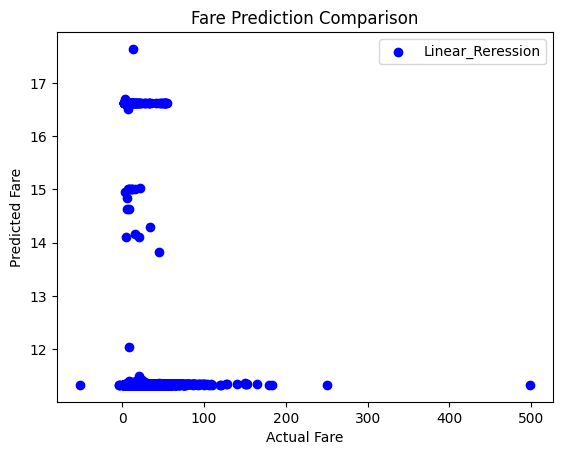

In [26]:
#ploting graph for showing predicting 
plt.scatter(Y_test,lr_pred,color='blue',label="Linear_Reression")

plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Fare Prediction Comparison')

# Add a legend
plt.legend()
plt.show()

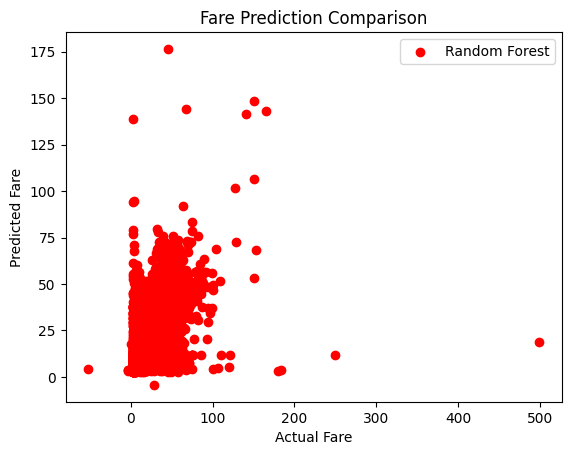

In [27]:
plt.scatter(Y_test,rf_pred,color='red',label="Random Forest")
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Fare Prediction Comparison')

# Add a legend
plt.legend()
plt.show()